In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc dữ liệu
df = pd.read_csv('automobileEDA.CSV')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

### Dự đoán giá Price dựa vào highwaypmg

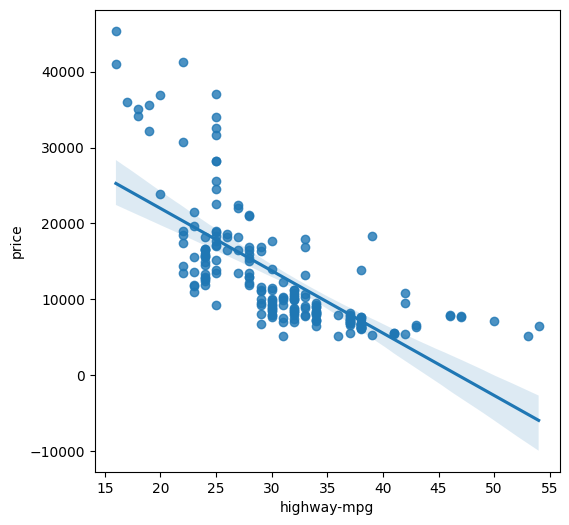

In [4]:
plt.figure(figsize=(6,6))
sns.regplot(data=df,x='highway-mpg', y='price')
plt.show()

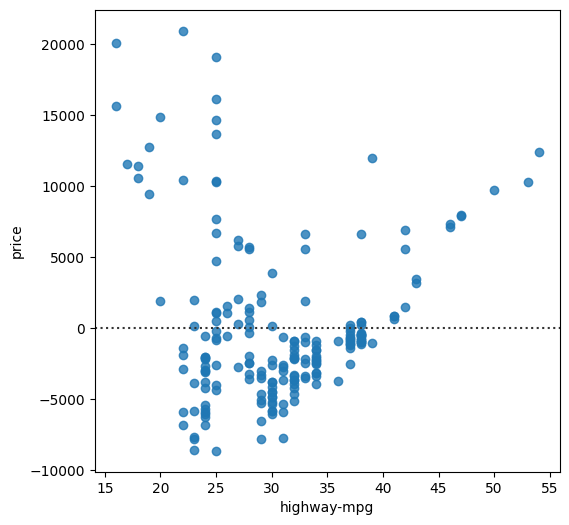

In [5]:
plt.figure(figsize=(6,6))
sns.residplot(data=df,x='highway-mpg', y='price')
plt.show()

In [6]:
# import thư viện
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression

In [14]:
X = df[['highway-mpg']]
y = df[['price']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
# Đánh giá cho toàn bộ dữ liệu
model.score(X,y)

0.4832679940001344

In [19]:
# Đánh giá cho tập train
model.score(X_train,y_train)

0.5012547295070147

In [20]:
# Đánh giá cho tập test
model.score(X_test,y_test)

0.4246692398775024

In [21]:
# Tính MSE, MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mae = mean_absolute_error(y_test,y_pred)
mae

5962.68844677808

In [23]:
mse = mean_squared_error(y_test,y_pred)
mse

70389861.95619813

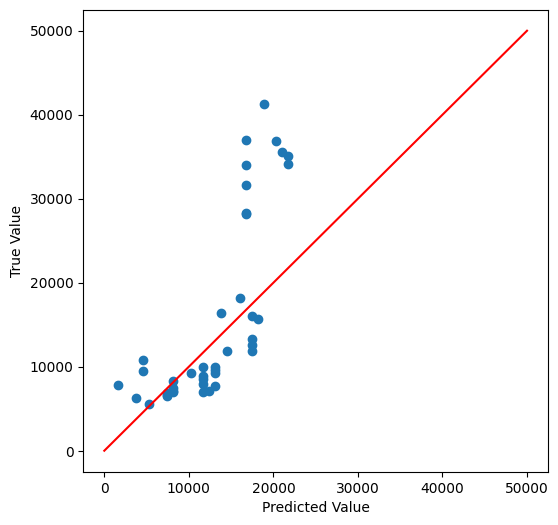

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(x=model.predict(X_test),y=y_test)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.plot([0,50000],[0,50000],'-',color = 'r')
plt.show()